# 0. 漫谈机器学习的分类算法

完成了回归算法的入门学习，接下来我们就要进入对分类算法的学习了。

分类任务占据了机器学习中监督学习任务的大头戏，监督学习中的大部分算法都是分类算法。分类算法间的关系与回归算法截然不同，多数回归算法基本上都是以最经典的线性回归为基础进行延拓的，这些延拓的回归算法身上多多少少都能找到线性回归的影子。而分类算法就不太一样了，多数分类算法的思想、模型形式、训练方法完全不同，因此同学们学起各种分类算法来可能总会觉得很分散，难以对它们做归纳总结。

为了帮助大家建立起一个较为清晰的分类算法体系，在正式学习各分类算法前，我们需要先学习一些有关分类问题的预备知识；然后将分类算法分为两种模型范式——概率模型与非概率模型，并以这两种范式为基点，理清各种分类算法的关系。希望大家通过该章节的学习对分类算法有一个初步的、宏观的了解。

## 0.1 分类问题的预备知识

### 0.1.1 正类与反类

我们接下来讨论的所有分类问题都是二分类问题，所有分类算法都是二分类算法，这是因为多分类问题基本上都是二分类问题的延伸，并无本质上的区别。

在二分类中，类别通常会被分为**正类(positive class)**与**反类(negative class)**，正反类的定义可以自由决定，通常来说，我们会把我们想要寻找的类、着重分析的类定义为正类。例如：在垃圾邮件的鉴别问题中，我们会把垃圾邮件定义为正类，正常邮件定义为反类；在癌症筛查中，我们会把癌症阳性（患病）定义为正类，把癌症阴性（不患病）定义为反类。

正反类的标签（模型输出值$Y$）事实上也可以自由定义，但是为了模型形式的美观易懂，我们通常定义$Y=1/0$或$Y=1/-1$，其中将“正类”的输出值定义为$Y=1$，将“反类”的输出值定义为$Y=0/-1$。

### 0.1.2 分类指标——混淆矩阵、Accuracy、Precision、Recall、f1-score

假设现在得到了一个训练完成的分类模型并对一个测试集进行了预测，我们想要直观地获知模型预测的效果——模型分类精度(Accuracy)是多少？有多少正类样本被正确预测了，又有多少反类样本被正确预测了？仅仅依靠分类精度，我们可以全面地评判模型的预测性能吗？是否还有其他分类指标可供我们参考？

我们将先介绍混淆矩阵，再介绍各种分类指标，因为这些分类指标的计算都依赖于混淆矩阵中的常量。

**· 混淆矩阵**

混淆矩阵是分类问题中**最直观地**获知模型预测效果的工具，对于二分类问题，混淆矩阵的形式如下图所示


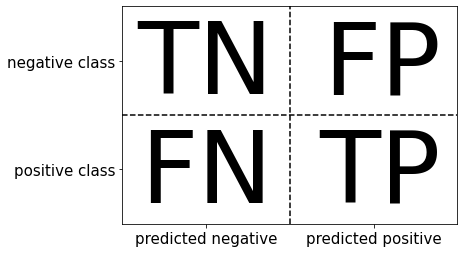

In [1]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

在混淆矩阵中，横行表示样本实际的属性，纵列表示样本被模型预测的属性，如果两者不一致(False Negative/False Postive)就意味着预测错误，如果两者一致则意味着预测正确(True Negative/True Positive)。

在Python中，模型预测指标的api基本上都在sklearn中的metrics模块，混淆矩阵也在其中，它的使用方式如下：

In [10]:
true_label1=[1,1,1,0,0,1,0,1] # 假设真实标签集是这样的
pred_label1=[1,0,1,0,0,0,0,1] # 假设模型预测的标签集是这样的

from sklearn.metrics import confusion_matrix
print(confusion_matrix(true_label1,pred_label1)) # 注意：第一个值输入的是真实的标签集，第二个值输入的是预测的标签集

print('--------------------------------------')

true_label2=[1,1,1,2,2,1,2,1] # 把所有的标签0换成2
pred_label2=[1,2,1,2,2,2,2,1] 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(true_label2,pred_label2)) 


[[3 0]
 [2 3]]
--------------------------------------
[[3 2]
 [0 3]]


我们可以注意到，confusion_matrix是通过标签值的大小来判断正负类的，大的是正类，小的是反类。在label1标签下，1是正类，0是反类；在label2标签下，2是正类，1是反类。因此我们在数据预处理环节对标签进行离散赋值时，将我们认为的正类赋值为1，反类赋值为0即可！

**· 多种分类指标——Accuracy真的普适吗？**

我们紧接上面的混淆矩阵讨论有关分类指标的问题。

第一个要介绍的当然就是就常见的分类正确率，也就是分类精度Accuracy。Accuracy衡量的是分类正确的样本占总样本的比例，计算公式为：
$$
Accuracy=\frac{TP+TN}{TP+TN+FP+FN}
$$
Accuracy作为判断模型分类性能的首选指标是没问题的，但是若只关注Accuracy，在某些情况下会严重误导我们对模型性能的判断。我们举一个例子：假设模型对某个数据集的分类混淆矩阵如下

<img src='./images/混淆矩阵1.png'>

经过计算，Accuracy接近95%，是一个非常不错的表现。但是我们稍加观察就会发现问题没有那么简单：在648个0样本中，有647个样本被正确分类，只有1个样本被错误分类；但是在36个1样本中，高达35个样本被错误分类，这说明模型完全丧失了对1样本的预测能力。这是模型非常糟糕的表现，然而如果我们只关注到了约95%的高分类精度，我们会错误地认为模型表现得很好。

这种样本种类分布极其不均衡的数据集被称为**不平衡数据集**，对于这种数据集的模型分类预测效果判断，仅靠分类精度是远远不够的，我们需要引入以下几个指标来解决这一问题——精确率Precision、召回率Recall、F分数f1-score。

**精确率(Precision)** 衡量的是所有被预测为正类的样本中，预测正确的比例，公式为：
$$
Precision=\frac{TP}{TP+FP}
$$

In [11]:
from sklearn.metrics import precision_score
precision_score(true_label1,pred_label1)

1.0

**召回率(Recall)** 衡量的是所有正类样本中，预测正确的比例，公式为：
$$
\mathrm{Re}call=\frac{TP}{TP+FN}
$$

In [12]:
from sklearn.metrics import recall_score
recall_score(true_label1,pred_label1)

0.6

这两个指标侧重点各有不同。如果我们的分类目标是限制假正例（0样本被预测为1样本），那么精确率就可以很好的度量；如果我们想限制假反例（1样本被预测为0样本），那么召回率就可以很好的度量。具体采用何种指标评判模型，取决于我们分类的需求，我们举两个例子帮助大家理解。

**ex1.** 垃圾短信为正类1，正常短信为反类0

我们在进行垃圾短信分类时，将垃圾短信正确预测固然重要，但是我们更要防止将正常短信预测为垃圾短信（message=0被预测为message=1），因为遗漏正常短信的代价远远大于遗漏垃圾短信，此时，以垃圾短信为正类的精确率就是一个很好的度量指标。

**ex2.** 有癌症为正类1，无癌症为反类0

我们对病人进行癌症诊断时，一旦将实际上有癌症的病人预测为无癌症（cancer=1被预测为cancer=0），癌症病人将错失最佳治疗时机而产生危险，因此遗漏有癌症的代价远远大于遗漏无癌症，此时，以有癌症为正类的召回率就是一个很好的度量指标。

**F1分数(F1-score)** 是精确率与召回率的调和平均，是两者的综合取舍，公式为：
$$
F1-score=2\cdot \frac{precision\cdot recall}{precision+recall}
$$


In [13]:
from sklearn.metrics import f1_score
f1_score(true_label1,pred_label1)

0.7499999999999999

如果我们想要对Precision、Recall、f1-score做一个全面的总结，可以使用metrics模块的classification_report：

In [15]:
from sklearn.metrics import classification_report
print(classification_report(true_label1,pred_label1))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



该报告分别输出了以0类和1类为正类的三指标，第一行就是以0类为正类的三指标，第二行则是以1类为正类的三指标；support则是每一类样本的数量，可以看到在该例中0类与1类的样本量分别为3和5.

## 0.2 分类算法的种类

分类算法的模型可分为概率模型和非概率模型。

我们在入门篇曾提到，概率模型以条件概率$P\left( Y|X \right) $作为模型，非概率模型以函数$y=f(x)$作为模型，这样便于大家快速区分。但事实上，条件概率分布$P\left( Y|X \right) $与函数$y=f(x)$是可以相互转化的。具体而言，将条件概率分布最大化便可以得到函数，将函数归一化后便得到条件概率分布（试想一下，一个值域为[0,1]的函数，是不是可以将之理解为一种概率呢？）因此，两者的区别不在于输入$X$与输出$Y$之间的映射关系，而在于模型的内在结构是否一定可以表示为联合概率分布的形式。

非概率模型算法中，代表性的算法有：感知机、支持向量机、k近邻、神经网络以及集成学习中的Adaboost。感知机是非常经典的通过一个函数分离超平面来判别样本的算法，支持向量机与神经网络也是在感知机的基础上变化而来的算法；k近邻是分类算法乃至机器学习算法中一个相当特殊的存在：它没有显式的模型和学习训练过程，即我们无法写出它的判别函数$f(x)$或者条件概率$P\left( Y|X \right) $，尽管它的分类思想相当简单。在本次学习中，我们将学习前三种算法。

概率模型算法中，代表性的算法有：朴素贝叶斯、Logistics回归与决策树，这三种算法各立门户，分类的思想迥然不同。看到“贝叶斯”三字，想都不用想这一定是一个和概率相关的算法，它基于贝叶斯定理与特征$X^{(i)}$之间相互独立的假设，是机器学习中为数不多的建立在严格的统计假设上的算法。Logistics回归也非常有趣，它是线性回归在分类问题上的拓展；它既可以看作是概率模型，也可以看作是非概率模型，不过从概率的角度去理解它会比较容易，因此这里我们将它归纳在了概率模型算法当中。决策树是机器学习分类算法中最重要的算法之一——从单模型的角度上看，决策树比起其它的分类模型可能算不上优秀，但是一旦将决策树与集成学习联系在一起，决策树强大的学习能力与集成学习范式强大的抗过拟合能力将产生非常强大的泛化能力，如GBDT算法、Xgboost都是基于树模型的集成学习算法，是当前机器学习算法中最强大的分类算法。因此，学好决策树对后续的集成学习算法的学习有非常大的帮助！

在本次课程中，我们将学习以下分类算法：
1. 感知机
2. 支持向量机
3. Logistics回归
4. k近邻
5. 朴素贝叶斯
6. 决策树

话不多说，我们开始学习第一个分类算法——**感知机**。


# 1. 感知机

## 1.1 感知机的思想与模型

### 1.1.1 直观理解感知机

感知机模型是一个二分类的**线性分类模型**，旨在用一个线性的、变量次数为1的超平面$wx+b=0$将训练集中的正反两类样本进行分离，超平面的两侧空间分别对应两个类别的样本。如下图所示

<img src='./images/感知机.jpg'>

上图中，我们假设特征$x$维度是2，因此超平面$w_1x^{(1)}+w_2x^{(2)}+b=0$在二维平面的特征空间中就是一条直线，直线的上方（即法向量$w$指向的一侧）的样本将被判别为正类，另一侧则被判别为反类。

### 1.1.2 感知机的数学模型

我们将正类样本的输出定义为$y=1$，将反类样本定义为$y=-1$，因此输出空间则为$\mathcal{Y} =\{1,-1\}$，样本的输出值$y \in \mathcal{Y}$；假设输入空间$\mathcal{X} \subseteq \mathbf{R}^n$，样本的输入向量有$x \in \mathcal{X}$，则感知机模型可以用如下从输入空间到输出空间的函数$f(x)$进行描述：
$$
f(x)=\mathrm{sign(}w\cdot x+b)=\begin{cases}
	1 \text{，}w\cdot x+b\geqslant 0\\
	-1 \text{，}w\cdot x+b<0\\
\end{cases}
$$
其中，sign为符号函数，$w$为线性模型的系数向量，$b$为截距项，$w\cdot x$为$w$与$x$的内积。

该模型表明样本$x$的判定类别取决于$w \cdot x+b$是大于0还是小于0。


## 1.2 感知机的学习策略

由于感知机模型本质上是一个线性超平面，因此使用感知机必须假设训练集数据是线性可分的，即可以用一个超平面对所有的正类与反类样本点进行**完全正确的划分**——当$x$是二维的时候，我们可以用一条直线划分；当$x$是三维的时候，我们可以用一条三维的平面划分；三维以上则是用超平面划分。线性可分性是感知机学习最重要的前提，其模型的学习策略就是建立在线性可分性上的！

### 1.2.1 损失函数

我们已经知道感知机的模型为函数$f(x)=\mathrm{sign(}w\cdot x+b)$，这其中需要求解的只有$w$和$b$，因此我们把目光锁定在寻找最优的超平面$S ：w\cdot x+b=0$。

对于一个分类问题，我们想让模型最优，一个自然而然的想法便是让错误分类的点个数达到最低，此时风险函数便是0-1损失函数
$$
L(Y, f(X))= \begin{cases}1, & Y \neq f(X) \\ 0, & Y=f(X)\end{cases}
$$
但是，0-1损失函数是一个示性函数$sign()$，它关于我们需要进行求解的参数$w$与$b$不是连续可导，我们很难对这样的优化问题求解（风险函数最小化本质上是一个优化问题）。既然将总损失函数直接定义为错误分类的点个数不合适，但又想模型不产生错分类点，我们可以转变一下思路：

对于任意一个样本点$\left(x_i, y_i\right)$，它到超平面$S$的距离可以根据点到面的距离公式算出：
$$
\frac{1}{\|w\|}\left|w \cdot x_0+b\right|
$$
我们在该公式的基础上再乘上它的真实输出标签$y_i$，于是便有：
$$
\frac{1}{\|w\|} y_i\left(w \cdot x_i+b\right)
$$
这个公式很有意思：它的绝对值与距离公式相同；但是当样本点$\left(x_i, y_i\right)$被正确分类时，它是正值；而它被错误分类时则是负值（大家思考一下为什么）。设所有误分类点的集合$M$，我们便可以用如下公式计算所有错误分类点到超平面$S$的总距离：
$$
-\frac{1}{\|w\|} \sum_{x_i \in M} y_i\left(w \cdot x_i+b\right)
$$
思考一下：模型不产生错分类点，是不是可以等价于所有错误分类点到超平面$S$的总距离为0呢？再加上该函数是关于$w$与$b$连续可导的，所以比起0-1损失函数之和，它更适合做感知机的总损失函数。

最后，由于我们的最终目的是让总距离函数为0，而对于一个满足该条件的确定的超平面$S$而言，$\|w\|$是确定的常数，因此我们可以将$\frac{1}{\|w\|}$去掉，所得到的函数就是感知机的总损失函数：
$$
L(w, b)=-\sum_{x_i \in M} y_i\left(w \cdot x_i+b\right)
$$
注意：这里说的总损失函数其实每个样本的损失函数相加，将总损失函数取平均就是风险函数，只不过对于最优化问题而言，将总损失函数作为目标函数与将风险函数作为目标函数是完全等价的。为了让大家不混淆概念，在后续的学习中提到的“损失函数”实际上是总损失函数。

令总损失函数最小化得到$(w,b)$，就是感知机的学习策略：
$$
\min _{w, b} L(w, b)=-\sum_{x_i \in M} y_i\left(w \cdot x_i+b\right)
$$

## 1.3 感知机的学习算法

**· 算法概述**

感知机算法使用误分类样本点驱动的**随机梯度下降法**对上述最优化问题进行求解。那么，什么是“误分类样本点驱动”？“随机梯度下降法”又是什么呢？别着急，我们用一段话概括感知机模型的学习过程：

首先，我们**任意地**选取一组参数$(w_0,b_0)$并根据它们构成一个超平面$w_0x+b_0x=0$，这种在一开始的时候随意地生成一个模型的步骤被称为**初始化**，这个初始化的模型一定是“错误百出的”，我们需要通过一些算法将这个漏洞百出的模型变成最优的模型，这个过程就是所谓的模型学习。

回到感知机的学习过程。对于超平面$w_0x+b_0x=0$而言，一定有许多错误分类的点，我们只关注这些误分类点并使用它们对模型进行纠正，这就是“误分类样本点驱动”；设误分类点集合为$M$，我们随机地选取集合$M$中的一个误分类点$x_i$使其梯度下降，这种随机选取一个点进行梯度下降而非一次性使所有点梯度下降的方法就是“随机梯度下降”。进行一轮随机梯度下降后，我们便得到了一组新的参数$(w_1,b_1)$和超平面$w_1x+b_1x=0$，重复以上步骤，直至没有误分类点，我们的感知机模型就训练完成了！

**· 基于感知机损失函数的随机梯度下降推导**

通过上述算法的概述我们可以看到，梯度下降是优化过程的核心算法，我们在这里简单地介绍基于感知机损失函数的随机梯度。

已知损失函数为$L(w, b)=-\sum_{x_i \in M} y_i\left(w \cdot x_i+b\right)$，那么它关于$w$与$b$的梯度分别就是
$$
\begin{gathered}
\nabla_w L(w, b)=-\sum_{x_i \in M} y_i x_i \\
\nabla_b L(w, b)=-\sum_{x_i \in M} y_i
\end{gathered}
$$
在第$j$轮迭代更新中，随机选取一个误分类点$(x_i,y_i)$，对$(w_{j-1},b_{j-1})$进行参数更新：
$$
\begin{gathered}
w_{j} \leftarrow w_{j-1}+\eta y_i x_i \\
b_{j} \leftarrow b_{j-1}+\eta y_i
\end{gathered}
$$
其中$\eta$是迭代步长，在机器学习中又被称为学习率，需要人为给定。由于参数更新的过程就是损失函数沿梯度方向下降的过程，经过数轮迭代后，损失函数将不断减小，最终降低至0，此时将没有任何误分类点，模型学习结束。

**· 算法总结**

输入：训练集$T=\left\{\left(x_1, y_1\right),\left(x_2, y_2\right), \cdots,\left(x_N, y_N\right)\right\}$；学习率$\eta(0<\eta \leqslant 1)$

输出：参数$(w,b)$

学习过程：
1. 任意选取参数初值$w_0$，$b_0$；
2. 在训练集中任意选取一点$(x_i,y_i)$，判断$y_i\left(w \cdot x_i+b\right)$是否大于0，若大于0则选取其他点，若小于0则进入下一步；
3. 若$y_i\left(w \cdot x_i+b\right) \leqslant 0$：
$$
\begin{aligned}
&w \longleftarrow w+\eta y_i x_i \\
&b \longleftarrow b+\eta y_i
\end{aligned}
$$
4. 返回步骤2重复迭代，直至训练集中所有点都有$y_i\left( w\cdot x_i+b \right) >0$

## 1.4 感知机知识拓展

以上便是感知机算法中比较重要的知识，了解了它们，大家基本上就可以明白感知机的原理了。事实上，除了上述学习算法外，感知机还存在一种该算法的对偶形式，相比于原算法，对偶算法训练模型的效率更高。由于篇幅所限，在这里就不介绍对偶算法了，感兴趣的同学可以自行查阅李航老师的《统计学习方法》。

此外，感知机模型有一些有趣的性质，在这里小做介绍一波~

### 1.4.1 最优模型的不唯一性

感知机的学习策略告诉我们只要模型不产生误分类点就是最优的，但对于一个线性可分的数据集而言，这样的超平面是有无穷多个的，如下图所示：

<img src='./images/线性可分.jpg'>

对于这样一个训练集，超平面$S_1$与$S_2$都可以完美地分离样本点，因此它们都是最优的感知机模型。事实上，我们在进行感知机学习时，采取不同的初值$(w_0,b_0)$以及在迭代中时选择不同的误分类点$(x_i,y_i)$，都会导致模型解的不同。

那么，如何在无穷个模型中找到“最优”的那个呢？这就是支持向量机要解决的问题了！

### 1.4.2 线性可分是重要前提

感知机的模型设定决定了它只能对线性可分的数据集进行分类，而一旦数据集线性不可分，1.3中的迭代将无法收敛。为解决这个问题，我们有两种思路：第一种是“降低要求”，不严格要求模型不产生误分类点；第二种是化线性为非线性，将模型从超平面变成一个曲面。而我们会在后面的学习中知道，这两种思路恰好对应两种支持向量机：线性支持向量机与核支持向量机，所以说，感知机是支持向量机的基础，支持向量机是对感知机的“一般化”。

## 1.5 感知机的python实现

感知机算法的api设置在linear_model模块下，指引文档地址为：

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 使用鸢尾花数据集
iris=load_iris()
X=iris.data # 特征
y=iris.target # 标志

# 数据集切分
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [4]:
perce=Perceptron().fit(X_train,y_train)
perce.score(X_test,y_test)

0.868421052631579

# 2. 支持向量机

## 2.1 支持向量机的思想与种类

### 2.1.1 支持向量机的思想——间隔最大化

对于感知机模型来说，只要一个超平面对线性可分的数据集做到完全正确地分类，这个超平面就是好的模型。而这样的超平面有无数个，有什么方法找到那个“最好的”那个超平面呢？我们可以通过下图直观感受这个问题。

<img src='./images/最大间隔.jpg'>

同样是两个分类完全正确的超平面，直观上看$S_1$比$S_2$要好得多，为什么呢？因为样本点A和B离$S_2$的间隔太小了，看起来这个超平面只是侥幸对这个训练数据集做到了分类完全正确，如果用它对一个新的测试集进行分类，它的分类精度有很大可能远低于训练集的分类精度。而$S_1$看上去靠谱的很多，因为各类别离它最近的点的间隔都很大。可以看到，我们用样本点到超平面的间隔距离来衡量一个超平面的好坏，这是因为**一个点距离超平面的远近可以代表分类预测的确信程度，距离越大，确信程度越高**。

支持向量机的思想就在于此，它的基本模型就是定义在特征空间上的间隔最大的线性分类器，其学习策略就是间隔最大化——具体来说，就是训练出一个超平面$S$，使得各类别离该超平面最近的点的间隔最大（注意这里讨论的是单个点到超平面的间隔，不是所有点到超平面的间隔之和！）

### 2.1.2 支持向量机的种类

支持向量机由简至繁包含三种模型：线性可分支持向量机-线性支持向量机-核支持向量机，这三个模型的应用场景也从特殊过渡到一般。

具体来说，当训练数据线性可分时，我们可以通过使**硬性间隔最大化**的策略学习到一个模型，基于该策略学习到的模型便是**线性可分支持向量机**。接下来，我们将应用场景稍作拓展：训练数据不严格线性可分，但线性超平面对绝大多数样本依旧能起到较好的分类作用，即训练数据近似线性可分。这种情况下，硬性间隔最大化的策略将失效，取而代之的是**软间隔最大化策略**，对应的模型便是**线性支持向量机**。最后，当训练数据完全线性不可分时，我们则可以**利用核函数将样本映射至一个新的特征空间，在新空间下样本是近似线性可分的，此时我们便可以利用软间隔最大化的策略训练模型**。由于核函数变换是这种算法的核心，因此我们将之称为**核支持向量机**。

以下为三种应用场景的图示：

<img src='./images/三种情况.jpg'>

### 2.1.3 一些奇妙的概念——输入空间与特征空间

输入空间、特征空间这两个概念在支持向量机中有比较重要的应用，但是它们俩解释起来又非常的高等代数（不讲人话），为了让大家更直观地明白它们的意义与区别，我们尽量解释得通俗易懂一些。

我们在使用感知机算法时，超平面是直接在输入空间中进行分类的，这个输入空间怎么理解呢？以上面的图示为例，假设输入变量为$x^{(1)}$与$x^{(2)}$，那么输入空间就是由这两个输入变量所有可能的取值所形成的空间——在图中就是由一个二维坐标轴构成的平面；若有三个连续输入变量，则输入空间便是一个由它们形成的三维空间。可以看到，感知机的超平面直接在该输入空间对样本点进行分类，因为不论样本点的坐标表示$(x^{(1)},x^{(2)})$，超平面的表达式$w_1x^{\left( 1 \right)}+w_2x^{\left( 2 \right)}+b=0$，还是整个模型的学习过程，都是基于$x^{(1)}$与$x^{(2)}$。

而特征空间也很好理解，有些时候我们在输入空间中很难对样本进行分类，如上图中的线性不可分情况。此时我们可以使用一个从输入空间到新空间的映射$\phi(x): \mathbf{R}^2 \rightarrow \mathcal{H}$。在该映射的作用下，旧空间中的样本点在新空间中拥有了新的坐标，例如，我们可以定义一个映射$\phi(x)$，使得$(x^{(1)},x^{(2)})\rightarrow (x^{(1)},x^{(2)},x^{(1)}\cdot x^{(2)})$，在该映射的作用下，原来的二维输入空间维度也增加到了三维，第三维正是$x^{(1)} \cdot x^{(2)}$，而这个在映射的作用下产生的新的三维空间，就是特征空间。之所以要定义特征空间，是因为某些在输入空间难以分类的样本，在经过巧妙地映射后，其在新的特征空间中就变得非常容易分类。

有关这点，我们看一下这个例子。(代码不需要掌握)

Text(0, 0.5, 'X2')

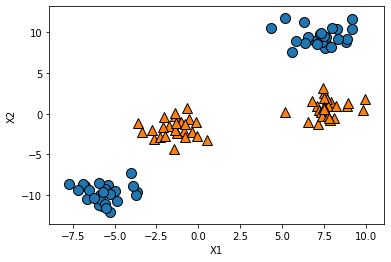

In [3]:
from sklearn.datasets import make_blobs
import mglearn
import numpy as np
import matplotlib.pyplot as plt

X,y=make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('X1')
plt.ylabel('X2')

这个数据集在输入空间中显然是线性不可分的，这个时候用上述的映射$\phi(x)$建立一个新的特征空间——在原输入空间的基础上，新增一个X1与X2特征的交互特征X1*X2，看看在这个新的特征空间中样本的分布情况：

C:\Users\TOPSHI~1\AppData\Local\Temp/ipykernel_14792/3834796022.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig,elev=-152,azim=-26)


Text(0.5, 0, 'X1*X2')

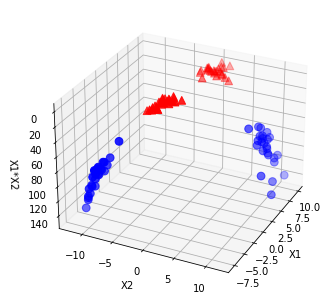

In [11]:
X_new=np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D,axes3d
fig=plt.figure()
ax=Axes3D(fig,elev=-152,azim=-26)
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1*X2')

可以看到，特征空间下的两个类别可以用一个超平面进行分离。


这就是输入空间与特征空间的通俗理解。三个支持向量机模型都是在特征空间中进行分类的，只不过线性可分支持向量机与线性支持向量机的样本线性可分假设使得我们不需要使用复杂的映射就可以进行分类，因此它们俩的特征空间实际上就是输入空间（或者说两者一一对应）。核支持向量机就是典型的在特征空间下进行分类的模型，不过核函数的存在使得我们不需要直接定义那个让人头疼的映射$\phi(x)$，这是核支持向量机算法非常有趣的一点，我们将在它的章节中介绍。

### 2.1.4 支持向量机的数学模型

我们在前面介绍了支持向量机的分类思想与种类，相信大家对于支持向量机“是什么”的问题已经有了初步的答案。那么接下来，我们正式开始支持向量机的数学模型，以及三种支持向量机模型的学习策略。由于支持向量机的算法涉及最优化的知识，有一定的难度，因此仅做简单的介绍。

首先看数学模型。



## 2.2 线性可分支持向量机

### 2.2.1 